In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
#What are the top 5 zipcodes for 911 calls?
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
#What are the top 5 townships for 911 calls?
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
#How many unique titles are in the 'title' column?
df['title'].nunique()

110

In [13]:
#Create a new column called 'Reason' that contains the string value (reason) after the title code
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [14]:
#What is the most common Reason for a 911 call?
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

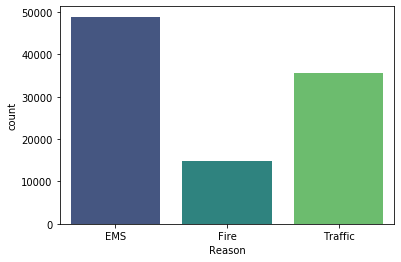

In [15]:
#Use seaborn to create a countplot of 911 calls by Reason.
sns.countplot(x= 'Reason', data = df, palette ='viridis')

In [16]:
#What is the data type of the objects in the timeStamp column?
type(df['timeStamp'].iloc[0])

str

In [17]:
#Use pd.to_datetime to convert the column from strings to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [18]:
#Use .apply() to create 3 new columns called Hour, Month, Day of Week
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [19]:
df['Day of Week'].head()

0    3
1    3
2    3
3    3
4    3
Name: Day of Week, dtype: int64

In [20]:
#Note Day of Week is in an integer form. Convert to days of the week
dmap = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [21]:
df['Day of Week'] = df['Day of Week'].map(dmap)

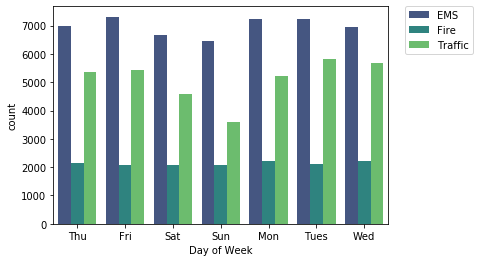

In [22]:
#Use seaborn to create a countplot of the Day of the Week column with the hue based off of the Reason column
sns.countplot(x = 'Day of Week', data =df, hue = 'Reason', palette = 'viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0) #Needed help with this step

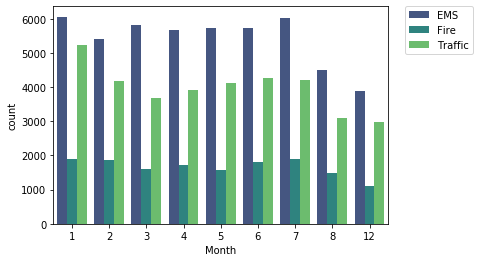

In [23]:
#Do the same for month
sns.countplot(x = 'Month', data = df, hue = 'Reason', palette = 'viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [24]:
#Note, some months are missing. Plot info in another way that fills in the missing months. Create a groupby object called byMonth
#where you group by the month column and use the count() method for aggregation. Then use the head() method
byMonth = df.groupby('Month').count()


In [25]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


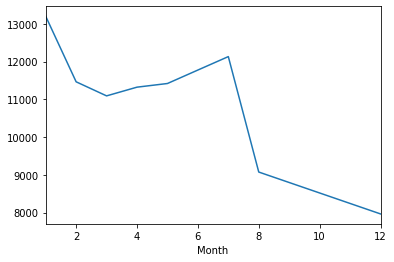

In [26]:
#Create a simple plot for count of calls per month
byMonth['twp'].plot()

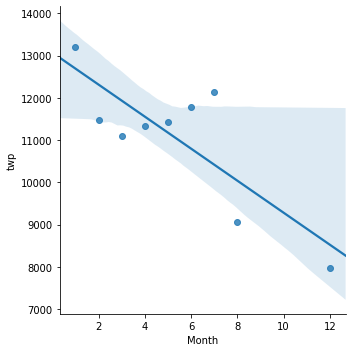

In [27]:
#Use seaborn's lmplot() to create a linear fit on the number of calls per month. 
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [28]:
#Create a new column called 'Date' that contains the date from the timeStamp column. 
df['Date'] = df['timeStamp'].apply(lambda t: t.date()) #Needed help with this (the date method)

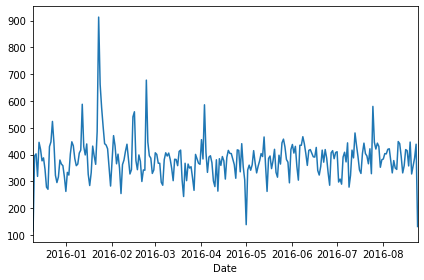

In [29]:
#groupby the Date column with the count() aggregate and create a plot of 911 calls
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

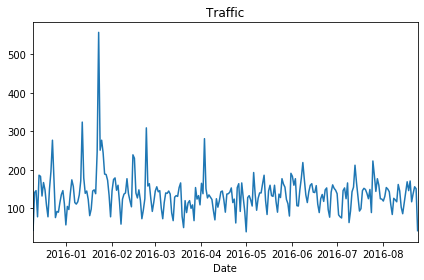

In [31]:
#Create 3 seperate plots with each plot representing a Reason for the 911 call
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

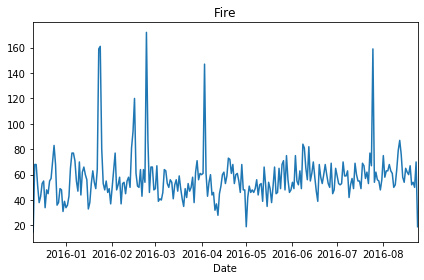

In [32]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

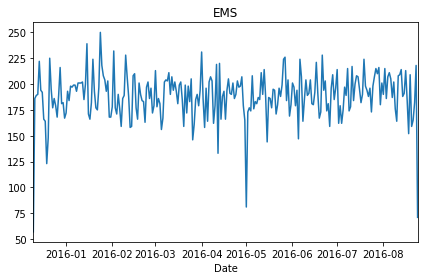

In [33]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [34]:
#Restructure the dataframe so that the columns become the Hours and the Index becomes Day of Week. Combine groupby with unstack
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()    #Needed help with this
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


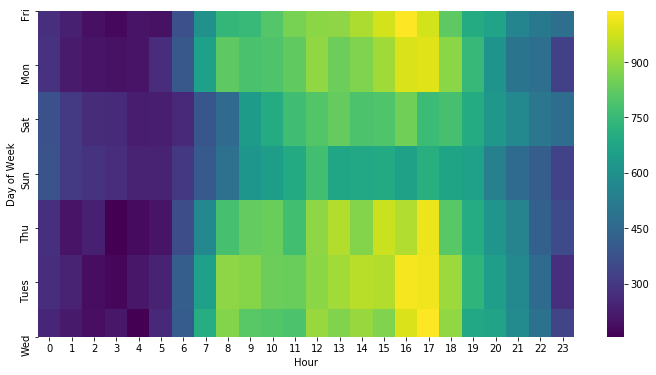

In [35]:
#Create a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

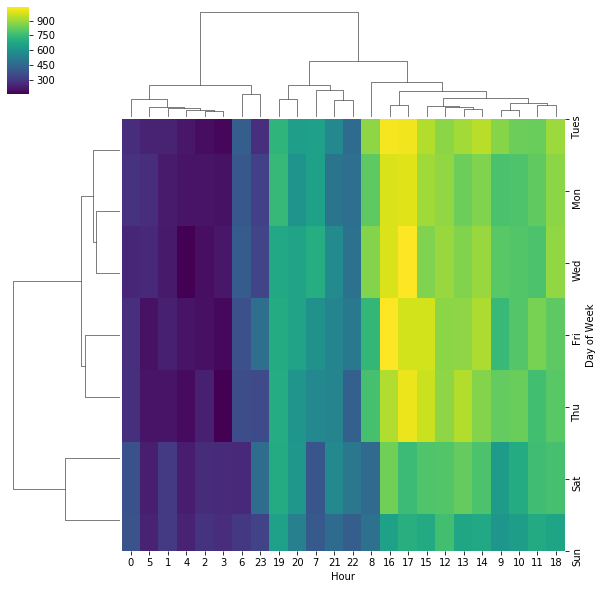

In [37]:
#Now create a clustermap with this DataFrame
sns.clustermap(dayHour, cmap = 'viridis')

In [38]:
#No repeat the plot and operations using the Month column
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


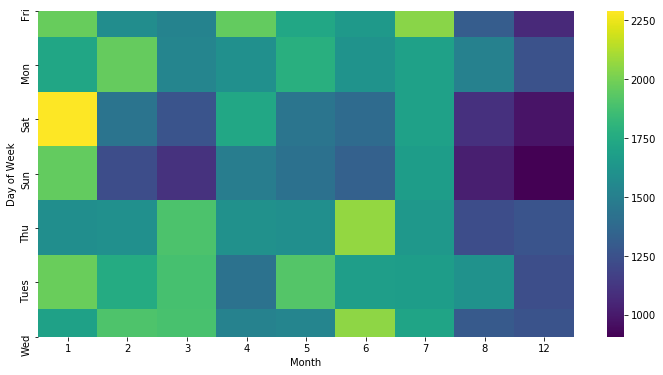

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap = 'viridis')

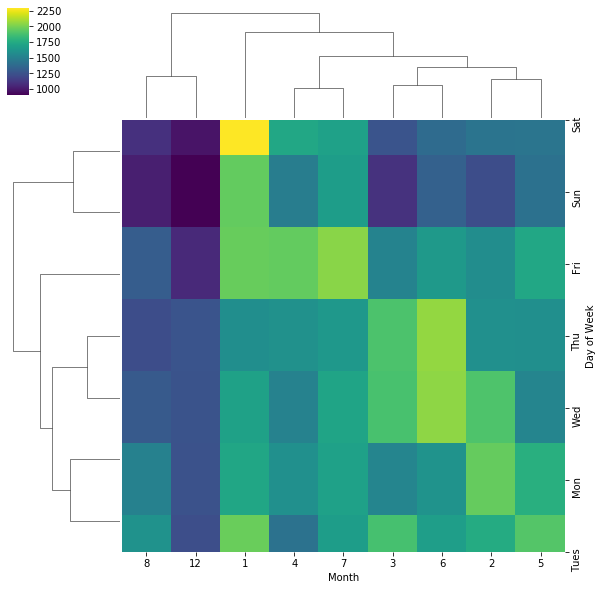

In [41]:
sns.clustermap(dayMonth, cmap = 'viridis')